In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Daily Challenge**

Findings:
The analysis reveals a strong negative correlation between discounts above 40% and profitability, particularly in the "Furniture" category, which becomes consistently unprofitable when discounts exceed 60%. Sales volumes generally peak in November and December across all product categories. Additionally, California stands out as the top-performing state in terms of total sales, far surpassing others.

Recommendations:
It is advisable to cap discounts between 20% and 30%, especially during the first half of the year. For the last quarter (October to December), reducing discounts to a range of 10% to 20% is recommended to protect profitability. Sales efforts should also prioritize high-performing regions such as California and New York to maximize returns.

## **Phase 1: Data Scoping and Preparation**



### **1.   Data Ingestion and Initial Assessment:**




In [5]:
import pandas as pd

superstore_file = pd.read_excel("/content/drive/MyDrive/GENAI/Week2/Day5/US Superstore data.xls")
df_superstore = pd.DataFrame(superstore_file)
df_superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [197]:
df_superstore.shape[0]

7143

In [198]:
df_superstore.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7143 entries, 0 to 9992
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         7143 non-null   int64         
 1   Order ID       7143 non-null   object        
 2   Order Date     7143 non-null   datetime64[ns]
 3   Ship Date      7143 non-null   datetime64[ns]
 4   Ship Mode      7143 non-null   object        
 5   Customer ID    7143 non-null   object        
 6   Customer Name  7143 non-null   object        
 7   Segment        7143 non-null   object        
 8   Country        7143 non-null   object        
 9   City           7143 non-null   object        
 10  State          7143 non-null   object        
 11  Postal Code    7143 non-null   int64         
 12  Region         7143 non-null   object        
 13  Product ID     7143 non-null   object        
 14  Category       7143 non-null   object        
 15  Sub-Category   7143 non-nu

In [199]:
df_superstore.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,7143.000000,7143,7143,7143.000000,7143.000000,7143.000000,7143.000000,7143.000000
mean,4986.891222,2016-05-03 01:33:32.431751424,2016-05-07 00:43:56.875262464,55591.522470,75.707309,3.407112,0.096742,13.001752
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.990000,1.000000,0.000000,-39.637000
25%,2475.500000,2015-05-28 00:00:00,2015-05-31 00:00:00,22204.000000,15.552000,2.000000,0.000000,3.240300
50%,4996.000000,2016-07-02 00:00:00,2016-07-04 00:00:00,55407.000000,37.752000,3.000000,0.000000,8.299200
75%,7449.500000,2017-05-18 12:00:00,2017-05-22 00:00:00,90036.000000,98.376000,4.000000,0.200000,19.623600
max,9993.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,496.860000,9.000000,0.500000,70.722000
std,2884.140974,NaN,NaN,32804.639049,92.209665,1.879085,0.106372,17.187931


In [200]:
df_superstore.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0




### **2.   Data Cleaning and Preprocessing:**



In [201]:
df_superstore.drop_duplicates(inplace=True)

On supprime les valeurs extremes des colonnes qui comportent des données quantitatives


In [202]:
columns = df_superstore.select_dtypes(include='number').columns

outliers = pd.DataFrame()

for col in columns:
  Q1 = df_superstore[col].quantile(0.25)
  Q3 = df_superstore[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outlier = df_superstore[(df_superstore[col] < lower_bound) | (df_superstore[col] > upper_bound)]
  outlier['outliers'] = col
  outliers = pd.concat([outliers, outlier])

outliers.drop_duplicates(inplace=True)
outliers

/tmp/ipython-input-202-2389085306.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier['outliers'] = col
/tmp/ipython-input-202-2389085306.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier['outliers'] = col
/tmp/ipython-input-202-2389085306.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,outliers
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136,Sales
40,41,CA-2015-117415,2015-12-27,2015-12-31,Standard Class,SN-20710,Steve Nguyen,Home Office,United States,Houston,...,Central,TEC-PH-10000486,Technology,Phones,Plantronics HL10 Handset Lifter,371.168,4,0.2,41.7564,Sales
57,58,CA-2016-111682,2016-06-17,2016-06-18,First Class,TB-21055,Ted Butterfield,Consumer,United States,Troy,...,East,FUR-CH-10003968,Furniture,Chairs,Novimex Turbo Task Chair,319.410,5,0.1,7.0980,Sales
85,86,CA-2017-140088,2017-05-28,2017-05-30,Second Class,PO-18865,Patrick O'Donnell,Consumer,United States,Columbia,...,South,FUR-CH-10000863,Furniture,Chairs,Novimex Swivel Fabric Task Chair,301.960,2,0.0,33.2156,Sales
103,104,US-2015-156867,2015-11-13,2015-11-17,Standard Class,LC-16870,Lena Cacioppo,Consumer,United States,Aurora,...,West,TEC-AC-10001552,Technology,Accessories,Logitech K350 2.4Ghz Wireless Keyboard,238.896,6,0.2,-26.8758,Sales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9933,9934,CA-2014-166555,2014-07-11,2014-07-14,First Class,JK-15205,Jamie Kunitz,Consumer,United States,Niagara Falls,...,East,TEC-PH-10004912,Technology,Phones,Cisco SPA112 2 Port Phone Adapter,164.850,3,0.0,47.8065,Profit
9936,9937,CA-2017-132955,2017-06-24,2017-06-28,Standard Class,SC-20575,Sonia Cooley,Consumer,United States,Cranston,...,East,OFF-BI-10002735,Office Supplies,Binders,GBC Prestige Therm-A-Bind Covers,102.930,3,0.0,48.3771,Profit
9966,9967,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,East,OFF-EN-10004483,Office Supplies,Envelopes,"#10 White Business Envelopes,4 1/8 x 9 1/2",109.690,7,0.0,51.5543,Profit
9970,9971,CA-2015-103772,2015-06-28,2015-07-02,Standard Class,MP-17470,Mark Packer,Home Office,United States,Smyrna,...,South,OFF-BI-10002867,Office Supplies,Binders,GBC Recycled Regency Composition Covers,119.560,2,0.0,54.9976,Profit


In [203]:
df_superstore.drop(outliers.index, inplace = True)
df_superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825


In [204]:
df_superstore.shape[0]

5874

In [205]:
df_superstore_cleaned = df_superstore.copy()

In [206]:
df_superstore_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5874 entries, 2 to 9992
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         5874 non-null   int64         
 1   Order ID       5874 non-null   object        
 2   Order Date     5874 non-null   datetime64[ns]
 3   Ship Date      5874 non-null   datetime64[ns]
 4   Ship Mode      5874 non-null   object        
 5   Customer ID    5874 non-null   object        
 6   Customer Name  5874 non-null   object        
 7   Segment        5874 non-null   object        
 8   Country        5874 non-null   object        
 9   City           5874 non-null   object        
 10  State          5874 non-null   object        
 11  Postal Code    5874 non-null   int64         
 12  Region         5874 non-null   object        
 13  Product ID     5874 non-null   object        
 14  Category       5874 non-null   object        
 15  Sub-Category   5874 non-nu

On supprime ces colonnes car elles ne nous partagent pas d'informations pertinentes qui pourraient nous etre utile pour la suite


In [207]:
df_superstore_reduced = df_superstore_cleaned.drop(["Order ID", "Customer ID", "Product ID"], axis = 1)
df_superstore_reduced.head()

,Row ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714
4,5,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164
5,6,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694
6,7,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,Newell 322,7.280,4,0.0,1.9656
8,9,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825


In [208]:
df_superstore_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5874 entries, 2 to 9992
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         5874 non-null   int64         
 1   Order Date     5874 non-null   datetime64[ns]
 2   Ship Date      5874 non-null   datetime64[ns]
 3   Ship Mode      5874 non-null   object        
 4   Customer Name  5874 non-null   object        
 5   Segment        5874 non-null   object        
 6   Country        5874 non-null   object        
 7   City           5874 non-null   object        
 8   State          5874 non-null   object        
 9   Postal Code    5874 non-null   int64         
 10  Region         5874 non-null   object        
 11  Category       5874 non-null   object        
 12  Sub-Category   5874 non-null   object        
 13  Product Name   5874 non-null   object        
 14  Sales          5874 non-null   float64       
 15  Quantity       5874 non-nu

In [209]:
df_superstore_reduced2 = df_superstore_reduced.copy()

On utilise le one hot encoder pour les colonnes qui ont un faible nombre de cardinalitées pour eviter d'ajouter un trop grand nombre de colonnes. Sinon on utilise le label encoder

In [210]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_superstore_reduced2["Customer Name"] = le.fit_transform(df_superstore_reduced2["Customer Name"])
df_superstore_reduced2["City"] = le.fit_transform(df_superstore_reduced2["City"])
df_superstore_reduced2["State"] = le.fit_transform(df_superstore_reduced2["State"])
df_superstore_reduced2["Sub-Category"] = le.fit_transform(df_superstore_reduced2["Sub-Category"])
df_superstore_reduced2["Product Name"] = le.fit_transform(df_superstore_reduced2["Product Name"])
df_superstore_reduced2.head()

,Row ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2,3,2016-06-12,2016-06-16,Second Class,201,Corporate,United States,240,3,90036,West,Office Supplies,9,1117,14.620,2,0.0,6.8714
4,5,2015-10-11,2015-10-18,Standard Class,683,Consumer,United States,135,8,33311,South,Office Supplies,13,477,22.368,2,0.2,2.5164
5,6,2014-06-09,2014-06-14,Standard Class,113,Consumer,United States,240,3,90032,West,Furniture,8,474,48.860,7,0.0,14.1694
6,7,2014-06-09,2014-06-14,Standard Class,113,Consumer,United States,240,3,90032,West,Office Supplies,2,888,7.280,4,0.0,1.9656
8,9,2014-06-09,2014-06-14,Standard Class,113,Consumer,United States,240,3,90032,West,Office Supplies,3,411,18.504,3,0.2,5.7825


In [211]:
from sklearn.preprocessing import OneHotEncoder

Oh_shipping = pd.get_dummies(df_superstore_reduced2["Ship Mode"])
oh_country = pd.get_dummies(df_superstore_reduced2["Country"])
oh_region = pd.get_dummies(df_superstore_reduced2["Region"])
oh_category = pd.get_dummies(df_superstore_reduced2["Category"])

df_superstore_reduced2 = pd.concat([df_superstore_reduced2, Oh_shipping, oh_country, oh_region, oh_category], axis = 1)
df_superstore_reduced2.drop(["Ship Mode", "Country", "Region", "Category"], axis = 1, inplace = True)
df_superstore_reduced2.head()

,Row ID,Order Date,Ship Date,Customer Name,Segment,City,State,Postal Code,Sub-Category,Product Name,...,Second Class,Standard Class,United States,Central,East,South,West,Furniture,Office Supplies,Technology
2,3,2016-06-12,2016-06-16,201,Corporate,240,3,90036,9,1117,...,True,False,True,False,False,False,True,False,True,False
4,5,2015-10-11,2015-10-18,683,Consumer,135,8,33311,13,477,...,False,True,True,False,False,True,False,False,True,False
5,6,2014-06-09,2014-06-14,113,Consumer,240,3,90032,8,474,...,False,True,True,False,False,False,True,True,False,False
6,7,2014-06-09,2014-06-14,113,Consumer,240,3,90032,2,888,...,False,True,True,False,False,False,True,False,True,False
8,9,2014-06-09,2014-06-14,113,Consumer,240,3,90032,3,411,...,False,True,True,False,False,False,True,False,True,False




### **3.   Feature Engineering:**




In [212]:
df_superstore_reduced["Profit Margin"] = (df_superstore_reduced["Profit"] / df_superstore_reduced["Sales"]) * 100
df_superstore_reduced["Order Year"] = df_superstore_reduced["Order Date"].dt.year
df_superstore_reduced["Order Month"] = df_superstore_reduced["Order Date"].dt.month
df_superstore_reduced["Ship Year"] = df_superstore_reduced["Ship Date"].dt.year
df_superstore_reduced["Ship Month"] = df_superstore_reduced["Ship Date"].dt.month

df_superstore_reduced.head()

,Row ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,...,Product Name,Sales,Quantity,Discount,Profit,Profit Margin,Order Year,Order Month,Ship Year,Ship Month
2,3,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,...,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.0,6.8714,47.00,2016,6,2016,6
4,5,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,Eldon Fold 'N Roll Cart System,22.368,2,0.2,2.5164,11.25,2015,10,2015,10
5,6,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,...,Eldon Expressions Wood and Plastic Desk Access...,48.860,7,0.0,14.1694,29.00,2014,6,2014,6
6,7,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,...,Newell 322,7.280,4,0.0,1.9656,27.00,2014,6,2014,6
8,9,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,...,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,5.7825,31.25,2014,6,2014,6


On normalise les colonnes qui contiennent des données quantitatives


In [213]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_superstore_reduced[["Sales", "Quantity", "Discount", "Profit", "Profit Margin"]] = scaler.fit_transform(df_superstore_reduced[["Sales", "Quantity", "Discount", "Profit", "Profit Margin"]])
df_superstore_reduced.head()

,Row ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,...,Product Name,Sales,Quantity,Discount,Profit,Profit Margin,Order Year,Order Month,Ship Year,Ship Month
2,3,2016-06-12,2016-06-16,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,...,Self-Adhesive Address Labels for Typewriters b...,0.061564,0.166667,0.0,0.431341,0.974286,2016,6,2016,6
4,5,2015-10-11,2015-10-18,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,Eldon Fold 'N Roll Cart System,0.096561,0.166667,0.4,0.364723,0.667857,2015,10,2015,10
5,6,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,...,Eldon Expressions Wood and Plastic Desk Access...,0.216221,1.000000,0.0,0.542978,0.820000,2014,6,2014,6
6,7,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,...,Newell 322,0.028411,0.500000,0.0,0.356297,0.802857,2014,6,2014,6
8,9,2014-06-09,2014-06-14,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,...,DXL Angle-View Binders with Locking Rings by S...,0.079108,0.333333,0.4,0.414684,0.839286,2014,6,2014,6


In [214]:
df = df_superstore_reduced.drop(["Order Date", "Ship Date"], axis = 1)
df.head()

,Row ID,Ship Mode,Customer Name,Segment,Country,City,State,Postal Code,Region,Category,...,Product Name,Sales,Quantity,Discount,Profit,Profit Margin,Order Year,Order Month,Ship Year,Ship Month
2,3,Second Class,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,...,Self-Adhesive Address Labels for Typewriters b...,0.061564,0.166667,0.0,0.431341,0.974286,2016,6,2016,6
4,5,Standard Class,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,...,Eldon Fold 'N Roll Cart System,0.096561,0.166667,0.4,0.364723,0.667857,2015,10,2015,10
5,6,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,Furniture,...,Eldon Expressions Wood and Plastic Desk Access...,0.216221,1.000000,0.0,0.542978,0.820000,2014,6,2014,6
6,7,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,...,Newell 322,0.028411,0.500000,0.0,0.356297,0.802857,2014,6,2014,6
8,9,Standard Class,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,...,DXL Angle-View Binders with Locking Rings by S...,0.079108,0.333333,0.4,0.414684,0.839286,2014,6,2014,6


## **Phase 2: Exploratory Analysis with Matplotlib**



### **1.   Time-Series Trend Investigation:**



In [215]:
import matplotlib.pyplot as plt
import ipywidgets as widgets


category_dropdown = widgets.Dropdown(
    options=df['Category'].unique(),
    description='Category:'
)

def update_chart(selected_category):

    filtered_df = df[df['Category'] == selected_category]

    grouped = filtered_df.groupby(['Order Year', 'Order Month'])['Sales'].sum().reset_index()
    pivot_df = grouped.pivot(index='Order Month', columns='Order Year', values='Sales')

    plt.figure(figsize=(10, 5))
    for year in pivot_df.columns:
        plt.plot(pivot_df[year], marker='o', label=str(year))

    plt.title('Total Sales per Month by Year')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.xticks(ticks=range(1, 13), labels=[
        'Jan', 'Fev', 'Mar', 'Avr', 'Mai', 'Jui',
        'Jui', 'Aou', 'Sep', 'Oct', 'Nov', 'Dec'
    ])
    plt.legend(title='Year')
    plt.grid(True)
    plt.show()


widgets.interactive(update_chart, selected_category=category_dropdown)

interactive(children=(Dropdown(description='Category:', options=('Office Supplies', 'Furniture', 'Technology')…

In general, sales increase throughout the year
and are highest between November and December, regardless of product type.


### **2.   Geographic Performance Analysis:**



In [216]:
interactive_tool = widgets.IntSlider(
    value = df["State"].nunique(),
    min = 0,
    max = df["State"].nunique(),
    step=1,
    description = "State",
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'

)

def update_chart(number_state):

    filtered_df = df.groupby("State")["Sales"].sum().sort_values(ascending=False).head(number_state)
    plt.figure(figsize=(10, 5))
    plt.bar(filtered_df.index, filtered_df.values)
    plt.xlabel("State")
    plt.ylabel("Total Sales")
    plt.title(f"Top {number_state} States by Total Sales")
    plt.xticks(rotation=90)

widgets.interactive(update_chart, number_state=interactive_tool)

interactive(children=(IntSlider(value=48, continuous_update=False, description='State', max=48), Output()), _d…


## **Phase 3:**





### **1.   Product Profitability Report:**



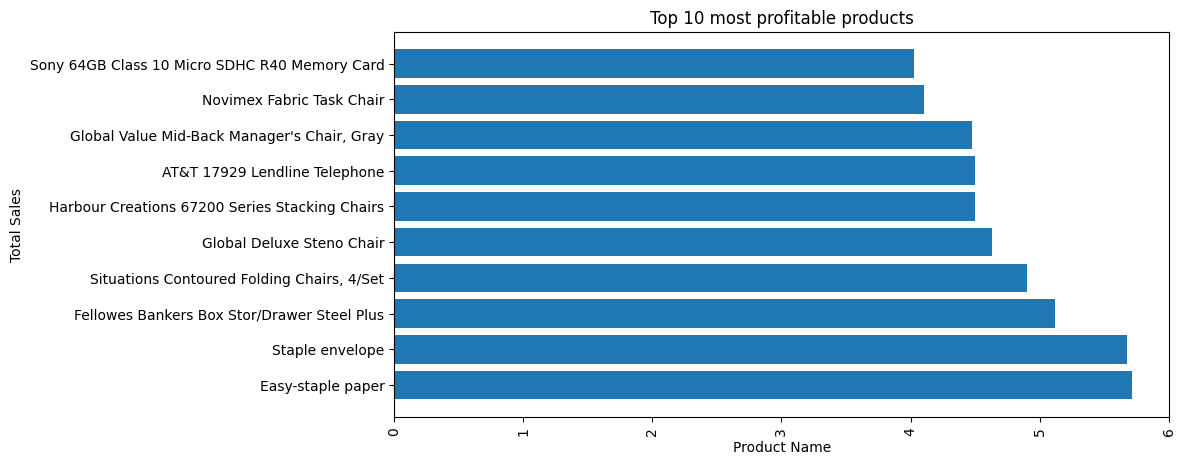

In [217]:
filtered_df = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
plt.barh(filtered_df.index, filtered_df.values, height=0.8)
plt.xlabel("Product Name")
plt.ylabel("Total Sales")
plt.title("Top 10 most profitable products")
plt.xticks(rotation=90)
plt.show()


### **2.   Discount Strategy Analysis:**



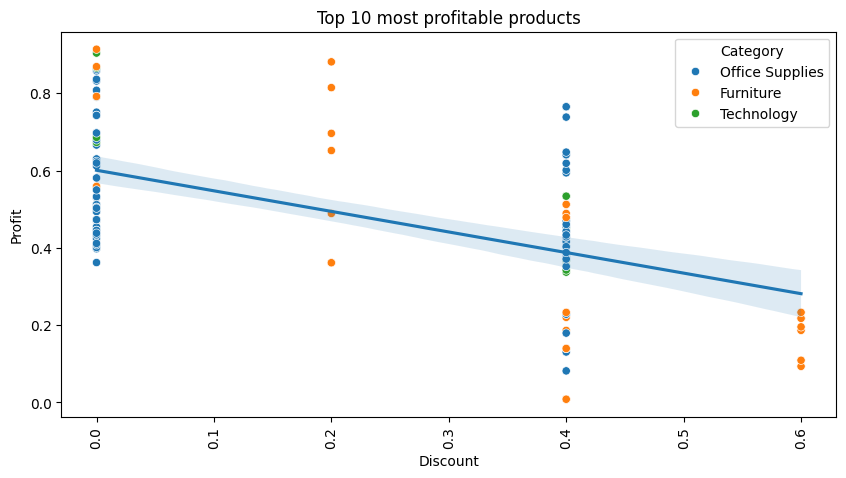

In [221]:
import seaborn as sns

filtered_df = df.groupby("Product Name")["Sales"].sum().sort_values(ascending=False).head(10)
filtered_df2 = df[df["Product Name"].isin(filtered_df.index)]
plt.figure(figsize=(10, 5))
sns.scatterplot(x = filtered_df2["Discount"], y = filtered_df2["Profit"], hue = filtered_df2["Category"])
sns.regplot(x=filtered_df2["Discount"], y=filtered_df2["Profit"], scatter=False)
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.title("Top 10 most profitable products")
plt.xticks(rotation=90)
plt.show()

Higher discounts generally reduce profit, especially in Technology and Furniture. Office Supplies are less affected.

## **Phase 4:**

In this project, Seaborn proved more efficient for quickly generating plots. Matplotlib, while slower to produce  visuals, offered essential fine-grained control for customizing layouts, axis labels, and spacing. Seaborn accelerated tasks like multi-category scatterplots and regression analysis, whereas Matplotlib was crucial when precise adjustments were needed. From now on, I will use Seaborn for rapid, multi-variable visualisation and I will use Matplotlib for adjusting visuals.

Findings : Analysis reveals a strong negative correlation between discount above 40% and profitability. Particularly within the "Furniture" category, which becomes consistently unprofitable at 60% discount. It also reveals that product are generarly more selled in november and december and that for all type of product. And it also provide the information that California is the state that make the most sales by far.

Recommendations : Reccoment capping the discount somwhere beteen 20% and 30%. Especially for the earlier month of the year. and reduce the discount between 10% and 20% for the last trimestre of the year. And focus the sales in california and new york.